<a href="https://colab.research.google.com/github/Zhiyuan-03/AI_in_Transportation_Exercise/blob/main/Lab1_Assignment_0.9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course AH2174/FAH3002 - Traffic Simulation Modeling and Applications   
Project 1 - Part I  
Author: Pengnan Chi  
Date: 11.3.2024

# Single Server Queueing Simulation Algorithm

$\textbf{Terms}$
* $\lambda$: arrival rate, `arrival_rate`
* $\mu$: service rate, `service_rate`
* $T$: close time, `close_time`
* $t$: current time, `time`
* $N_A$: total number of arrivals, `N_arrivals`
* $N_D$: total number of departures, `N_departures`
* $n$: queue length, `n`
* $t_A$: next arrival time, `t_arrival`
* $t_D$: next departure time, `t_departure`
* $X$: arrival time
* $Y$: service time
* $A$: arrival time for each vehicle    , `A`
* $D$: departure time for each vehicle, `D`
* $q$: queue length for each recording time, `queue`



$\textbf{Initialization}$
1. $t=N_A =N_D = n \leftarrow 0$
2. Generate $X$, $t_A \leftarrow 0 + X$
3. $t_D \leftarrow  \infty$


$\textbf{Simulation}$
*   if $t_A \leq t_D$ and $t_A \leq T$:
    *   $t \leftarrow  t_A$
    *   $n \leftarrow n + 1$
    *   $q \ \text{appends}  \ [n; t]$
    *   $N_A \leftarrow N_A + 1$
    *   $A \ \text{appends}  \ [N_A; t]$
    *   $t_A \leftarrow t + X$
    *   if $n = 1$:
        *   $t_D \leftarrow t + Y$

*   if $t_D < t_A$ and $t_D \leq T$:
    *   $t = t_D$
    *   $n = n - 1$
    *   $q \ \text{appends}  \ [n; t]$
    *   $N_D \leftarrow N_D + 1$
    *   $D \ \text{appends}  \ [N_D; t]$
    *   if $n = 0$:
        *   $t_D \leftarrow \infty$
    *   else:
        *   $t_D \leftarrow t + Y$

*   if $t_A > T$ and $t_D > T$:
    *   while $n > 0$:
        *   $t = t_D$
        *   $n = n - 1$
        *   $q \ \text{appends}  \ [n; t]$
        *   $N_D \leftarrow N_D + 1$
        *   $D \ \text{appends}  \ [N_D; t]$
        *   if $n > 0$:
            *   $t_D \leftarrow t + Y$

    *   if $n=0$:
        *   break






Complete `SingleServerQueueingSimulation` by filling the code under "`YOU CODE HERE`". You can also change the rest of the code skeleton according to your need!

In [29]:
import numpy as np
import matplotlib.pyplot as plt

class SingleServerQueueingSimulation():
    """
    This class simulates a single-server queueing system using discrete event simulation.
    The system models customer arrivals and service at a single server.
    It collects data on queue length, arrival times, and departure times.
    """

    def __init__(self, arrival_rate, service_rate, close_time):
        """
        Initializes the simulation with the given parameters.

        Parameters:
        - arrival_rate: The rate (per minute) at which customers arrive.
        - service_rate: The rate (per minute) at which the server can serve customers.
        - close_time: The time (in minutes) after which no new customers are allowed to join the queue.
        """
        self.arrival_rate = arrival_rate  # Set the customer arrival rate.
        self.service_rate = service_rate  # Set the service rate for the server.
        self.close_time = close_time  # Time after which no new arrivals are permitted.

        # Use your own exponential random number generator to model arrival and service times.
        ####################################################################
        #  YOU CODE HERE
        ####################################################################
        # Define exponential random number generators for arrival and service times
        self.generate_interarrival_time = lambda: np.random.exponential(1 / self.arrival_rate)
        self.generate_service_time = lambda: np.random.exponential(1 / self.service_rate)

        # Dictionary to store the results of each simulation run.
        # {
        #     'round_0': {
        #         'queue': queue,
        #         'A': A,
        #         'D': D,
        #     },
        #     'round_1': {...},
        #     'round_2': {...},
        #     ...
        # }
        self.simulation_records = {}

    def simulate(self):
        """
        Runs a single instance of the queueing simulation.

        Tracks the current time, the number of arrivals and departures, and records
        arrival and departure times. The simulation runs until all customers have been served
        after the system closes to new arrivals.

        Returns:
        - queue: A record of the number of vehicles in the queue over time.
        - A: A record of arrival times.
        - D: A record of departure times.
        """
        # Initialize simulation state variables.
        ####################################################################
        #  YOU CODE HERE
        ####################################################################
        # Initialize simulation state variables
        t = 0                  # Current time
        N_arrivals = 0         # Total number of arrivals
        N_departures = 0       # Total number of departures
        n = 0                  # Queue length

        # Generate first arrival time
        X = self.generate_interarrival_time()
        t_arrival = t + X      # Time of next arrival
        t_departure = float('inf')  # No departure scheduled yet

        # Lists to record queue length, arrival times, and departure times
        queue = []
        A = []
        D = []

        system_step_count = 0
        # Main simulation loop to process events (arrivals or departures).
        while True:
            # if system_step_count >3:
            #   break
            # else:
            #   system_step_count += 1

            # Case 1: A customer arrives before the next departure and before the system closes.
            ####################################################################
            #  YOU CODE HERE
            ####################################################################
            if t_arrival <= t_departure and t_arrival <= self.close_time:
                t = t_arrival
                n += 1
                queue.append([n, t])
                N_arrivals += 1
                A.append([N_arrivals, t])
                t_arrival = t + self.generate_interarrival_time()
                if n == 1:
                    t_departure = t + self.generate_service_time()
                # print('case 1', t_arrival, t_departure)

            # Case 2: A customer departs before the next arrival and before the system closes.
            ####################################################################
            #  YOU CODE HERE
            ####################################################################
            elif t_departure < t_arrival and t_departure <= self.close_time:
                t = t_departure
                n -= 1
                queue.append([n, t])
                N_departures += 1
                D.append([N_departures, t])
                if n == 0:
                    t_departure = float('inf')
                else:
                    t_departure = t + self.generate_service_time()
                # print('case 2', t_arrival, t_departure)


                # print(t_arrival, t_departure)
                # a=ggggggg
            # Case 3: Stop the simulation if there are no more arrivals or departures.
            ####################################################################
            #  YOU CODE HERE
            ####################################################################
            elif t_arrival > self.close_time and t_departure > self.close_time:
                # print('case 3 start', t_arrival, t_departure)
                if n==0:
                  break

                if n > 0:
                    t = t_departure
                    n -= 1
                    queue.append([n, t])
                    N_departures += 1
                    D.append([N_departures, t])
                    if n > 0:
                        t_departure = t + self.generate_service_time()
                    else:
                        break
                    # print('case 3', t_arrival, t_departure)

            else:
                break

        # Convert lists to NumPy arrays for easier manipulation and analysis.
        queue = np.array(queue)
        A = np.array(A)
        D = np.array(D)
        # Return the recored queue states, arrival times, and departure times.
        return queue, A, D

    def run_multiple_simulations(self, n_simulations):
        """
        Runs the simulation multiple times and stores the results in simulation_records.

        Parameters:
        - n_simulations: Number of simulation runs to perform.

        Populates the simulation_records dictionary with the queue, arrival, and
        departure data for each simulation.
        """
        for i in range(n_simulations):
            queue, A, D = self.simulate()  # Run a single simulation.
            # Store the results in the simulation_records dictionary.
            self.simulation_records[f"round_{i}"] = {'queue': queue, 'A': A, 'D': D}
        return

    def compute_average_queue_length(self):
        """
        Computes the average queue length across all simulation runs.

        Returns:
        - The mean and standard deviation of the average queue length over all runs.
        """
        warm_up_period = 50 # Number of points to exclude from the start of the simulation
        average_queue_length = []  # List to store average queue lengths from each run.
        for values in self.simulation_records.values():
            queue = values['queue']  # Get the queue data for the current simulation.
            # Calculate the average queue length
            # NOTE: first points can be excluded, we only want the queue length in the steady state
            # NOTE: the number of vehicles in the queue is NOT evenly distributed along the simulation time
            #      find a way to weight the queue length by the time spent at each queue length
            ####################################################################
            #  YOU CODE HERE
            ####################################################################
            #average_queue_length.append(queue_length)
            # Exclude warm-up period
            queue = queue[warm_up_period:]

            if len(queue) < 2:
                continue  # Skip if not enough data points

            # Calculate time intervals between queue states
            times = queue[:, 1]
            lengths = queue[:, 0]
            time_deltas = np.diff(times)
            queue_lengths = lengths[:-1]  # Corresponding queue lengths for each interval

            # Weighted average: sum(queue_length * time_spent) / total_time
            weighted_sum = np.sum(queue_lengths * time_deltas)
            total_time = np.sum(time_deltas)
            queue_length = weighted_sum / total_time if total_time > 0 else 0

            average_queue_length.append(queue_length)

        # Return the overall mean and standard deviation of the average queue lengths.
        return np.mean(average_queue_length), np.std(average_queue_length)

    def compute_average_waiting_time(self):
        """
        Computes the average waiting time for customers across all simulation runs.

        Returns:
        - The mean and standard deviation of the average waiting times across all runs.
        """
        warm_up_period = 50 # Number of points to exclude from the start of the simulation
        average_waiting_time = []  # List to store average waiting times from each run.
        for values in self.simulation_records.values():
            A = values['A']  # Get the arrival times.
            D = values['D']  # Get the departure times.
            # Calculate the average waiting time
            ####################################################################
            #  YOU CODE HERE
            ####################################################################
            # average_waiting_time.append(waiting_time)
            if len(A) == 0 or len(D) == 0:
                continue  # Skip if not enough data

            # Extract timestamps only
            arrival_times = A[:, 1]
            departure_times = D[:, 1]

            # Compute waiting times
            waiting_times = departure_times - arrival_times

            # Average waiting time for this run
            avg_wait = np.mean(waiting_times)
            average_waiting_time.append(avg_wait)
        # Return the mean and standard deviation of the average waiting times.
        return np.mean(average_waiting_time), np.std(average_waiting_time)

    def get_simulation_records(self):
        """
        Retrieves the recorded data from all simulation runs.

        Returns:
        - A dictionary containing the queue, arrival, and departure data for each simulation run.
        {
            'round_0': {
                'queue': queue,
                'A': A,
                'D': D,
            },
            'round_1': {...},
            'round_2': {...},
            ...
        }
        """
        return self.simulation_records


### Test your code!

*   The expected queue length is $\frac{\lambda}{\mu-\lambda}$
*   The expected waiting time is $\frac{1}{\mu-\lambda}$


In [31]:
sim = SingleServerQueueingSimulation(arrival_rate=6, service_rate=10, close_time=500)
sim.run_multiple_simulations(100)

print(sim.compute_average_queue_length())
print(sim.compute_average_waiting_time())




(np.float64(1.50858256720472), np.float64(0.11514385509838525))
(np.float64(0.2502490315900843), np.float64(0.01652303516289038))


Average Queue Length: (np.float64(8.612672603610875), np.float64(1.7307940048482118))
Average Waiting Time: (np.float64(0.5755463585199477), np.float64(0.11282852812434782))

Detailed Analysis:
Traffic intensity ρ: 0.898
Observations: 1493018, Total time: 49863.5 min

System Size (L):
  Empirical: mean=8.613, var=77.912
  Theoretical: mean=8.824, var=86.678

Queue Length (Lq):
  Empirical: mean=7.716, var=76.222
  Theoretical: mean=7.925, var=84.973

Final Results:
Queue Length Variance - Empirical: 76.222, Theoretical: 84.973
Probability(W > 3 minutes): 0.0033
Difference (Empirical - Theoretical): -8.751


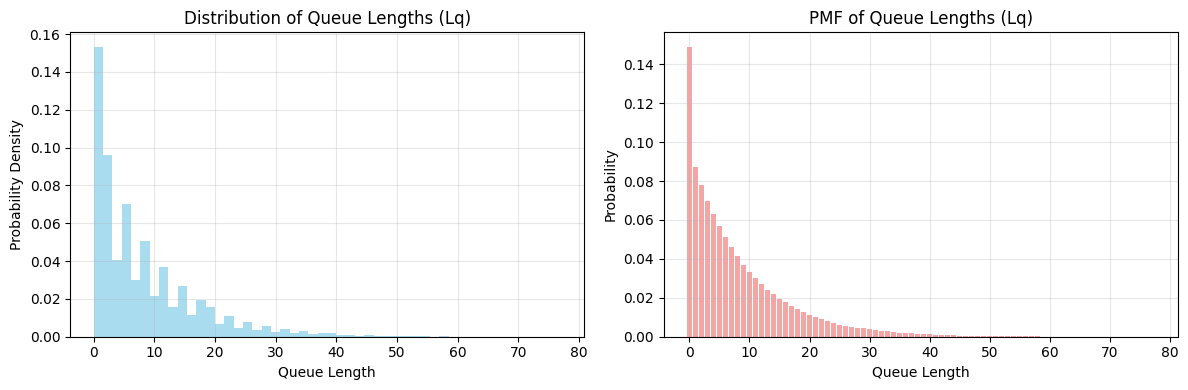

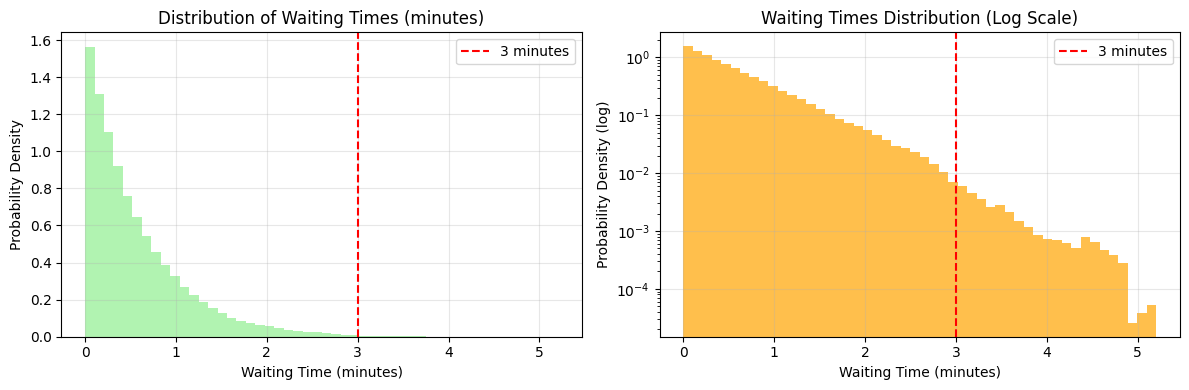

In [35]:
import numpy as np
import matplotlib.pyplot as plt

class SingleServerQueueingSimulation():
    """
    This class simulates a single-server queueing system using discrete event simulation.
    The system models customer arrivals and service at a single server.
    It collects data on queue length, arrival times, and departure times.
    """

    def __init__(self, arrival_rate, service_rate, close_time):
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.close_time = close_time

        self.generate_interarrival_time = lambda: np.random.exponential(1 / self.arrival_rate)
        self.generate_service_time = lambda: np.random.exponential(1 / self.service_rate)
        self.simulation_records = {}

    def simulate(self):
        t = 0
        N_arrivals = 0
        N_departures = 0
        n = 0

        X = self.generate_interarrival_time()
        t_arrival = t + X
        t_departure = float('inf')

        queue = []
        A = []
        D = []

        while True:
            if t_arrival <= t_departure and t_arrival <= self.close_time:
                t = t_arrival
                n += 1
                queue.append([n, t])
                N_arrivals += 1
                A.append([N_arrivals, t])
                t_arrival = t + self.generate_interarrival_time()
                if n == 1:
                    t_departure = t + self.generate_service_time()

            elif t_departure < t_arrival and t_departure <= self.close_time:
                t = t_departure
                n -= 1
                queue.append([n, t])
                N_departures += 1
                D.append([N_departures, t])
                if n == 0:
                    t_departure = float('inf')
                else:
                    t_departure = t + self.generate_service_time()

            elif t_arrival > self.close_time and t_departure > self.close_time:
                if n == 0:
                    break
                if n > 0:
                    t = t_departure
                    n -= 1
                    queue.append([n, t])
                    N_departures += 1
                    D.append([N_departures, t])
                    if n > 0:
                        t_departure = t + self.generate_service_time()
                    else:
                        break
            else:
                break

        queue = np.array(queue)
        A = np.array(A)
        D = np.array(D)
        return queue, A, D

    def run_multiple_simulations(self, n_simulations):
        for i in range(n_simulations):
            queue, A, D = self.simulate()
            self.simulation_records[f"round_{i}"] = {'queue': queue, 'A': A, 'D': D}
        return

    def compute_average_queue_length(self):
        warm_up_period = 50
        average_queue_length = []
        for values in self.simulation_records.values():
            queue = values['queue'][warm_up_period:]
            if len(queue) < 2:
                continue
            times = queue[:, 1]
            lengths = queue[:, 0]
            time_deltas = np.diff(times)
            queue_lengths = lengths[:-1]
            weighted_sum = np.sum(queue_lengths * time_deltas)
            total_time = np.sum(time_deltas)
            queue_length = weighted_sum / total_time if total_time > 0 else 0
            average_queue_length.append(queue_length)
        return np.mean(average_queue_length), np.std(average_queue_length)

    def compute_average_waiting_time(self):
        warm_up_period = 50
        average_waiting_time = []
        for values in self.simulation_records.values():
            A = values['A'][warm_up_period:]
            D = values['D'][warm_up_period:]
            if len(A) == 0 or len(D) == 0:
                continue
            arrival_times = A[:, 1]
            departure_times = D[:, 1]
            waiting_times = departure_times - arrival_times
            avg_wait = np.mean(waiting_times)
            average_waiting_time.append(avg_wait)
        return np.mean(average_waiting_time), np.std(average_waiting_time)

    import numpy as np
import matplotlib.pyplot as plt

class SingleServerQueueingSimulation():
    """
    This class simulates a single-server queueing system using discrete event simulation.
    The system models customer arrivals and service at a single server.
    It collects data on queue length, arrival times, and departure times.
    """

    def __init__(self, arrival_rate, service_rate, close_time):
        """
        Initializes the simulation with the given parameters.

        Parameters:
        - arrival_rate: The rate (per minute) at which customers arrive.
        - service_rate: The rate (per minute) at which the server can serve customers.
        - close_time: The time (in minutes) after which no new customers are allowed to join the queue.
        """
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.close_time = close_time

        self.generate_interarrival_time = lambda: np.random.exponential(1 / self.arrival_rate)
        self.generate_service_time = lambda: np.random.exponential(1 / self.service_rate)
        self.simulation_records = {}

    def simulate(self):
        # Initialize simulation state variables
        t = 0
        N_arrivals = 0
        N_departures = 0
        n = 0

        # Generate first arrival time
        X = self.generate_interarrival_time()
        t_arrival = t + X
        t_departure = float('inf')

        # Lists to record queue length, arrival times, and departure times
        queue = []
        A = []
        D = []

        # Main simulation loop to process events (arrivals or departures)
        while True:
            # Case 1: A customer arrives before the next departure and before the system closes
            if t_arrival <= t_departure and t_arrival <= self.close_time:
                t = t_arrival
                n += 1
                queue.append([n, t])
                N_arrivals += 1
                A.append([N_arrivals, t])
                t_arrival = t + self.generate_interarrival_time()
                if n == 1:
                    t_departure = t + self.generate_service_time()

            # Case 2: A customer departs before the next arrival and before the system closes
            elif t_departure < t_arrival and t_departure <= self.close_time:
                t = t_departure
                n -= 1
                queue.append([n, t])
                N_departures += 1
                D.append([N_departures, t])
                if n == 0:
                    t_departure = float('inf')
                else:
                    t_departure = t + self.generate_service_time()

            # Case 3: Stop the simulation if there are no more arrivals or departures
            elif t_arrival > self.close_time and t_departure > self.close_time:
                if n == 0:
                    break
                if n > 0:
                    t = t_departure
                    n -= 1
                    queue.append([n, t])
                    N_departures += 1
                    D.append([N_departures, t])
                    if n > 0:
                        t_departure = t + self.generate_service_time()
                    else:
                        break
            else:
                break

        # Convert lists to NumPy arrays for easier manipulation and analysis
        queue = np.array(queue)
        A = np.array(A)
        D = np.array(D)
        return queue, A, D

    def run_multiple_simulations(self, n_simulations):
        for i in range(n_simulations):
            queue, A, D = self.simulate()
            self.simulation_records[f"round_{i}"] = {'queue': queue, 'A': A, 'D': D}
        return

    def compute_average_queue_length(self):
        warm_up_period = 50
        average_queue_length = []
        for values in self.simulation_records.values():
            queue = values['queue'][warm_up_period:]
            if len(queue) < 2:
                continue
            times = queue[:, 1]
            lengths = queue[:, 0]
            time_deltas = np.diff(times)
            queue_lengths = lengths[:-1]
            weighted_sum = np.sum(queue_lengths * time_deltas)
            total_time = np.sum(time_deltas)
            queue_length = weighted_sum / total_time if total_time > 0 else 0
            average_queue_length.append(queue_length)
        return np.mean(average_queue_length), np.std(average_queue_length)

    def compute_average_waiting_time(self):
        warm_up_period = 50
        average_waiting_time = []
        for values in self.simulation_records.values():
            A = values['A'][warm_up_period:]
            D = values['D'][warm_up_period:]
            if len(A) == 0 or len(D) == 0:
                continue
            arrival_times = A[:, 1]
            departure_times = D[:, 1]
            waiting_times = departure_times - arrival_times
            avg_wait = np.mean(waiting_times)
            average_waiting_time.append(avg_wait)
        return np.mean(average_waiting_time), np.std(average_waiting_time)

    def analyze_queue_length_distribution(self):
        """Analyze queue length distribution across all simulations"""
        warm_up_period = 50
        time_weighted_queue_lengths = []
        time_weighted_system_sizes = []
        time_intervals = []

        for values in self.simulation_records.values():
            queue = values['queue'][warm_up_period:]

            if len(queue) < 2:
                continue

            times = queue[:, 1]
            system_sizes = queue[:, 0]  # This is n = number in system
            queue_lengths = np.maximum(0, system_sizes - 1)  # Queue length excludes the one in service

            time_deltas = np.diff(times)
            system_sizes_for_intervals = system_sizes[:-1]
            queue_lengths_for_intervals = queue_lengths[:-1]

            # Proper time-weighted collection
            for sys_size, q_length, delta in zip(system_sizes_for_intervals, queue_lengths_for_intervals, time_deltas):
                if delta > 0:
                    time_weighted_system_sizes.append(sys_size)
                    time_weighted_queue_lengths.append(q_length)
                    time_intervals.append(delta)

        # Convert to arrays
        time_weighted_system_sizes = np.array(time_weighted_system_sizes)
        time_weighted_queue_lengths = np.array(time_weighted_queue_lengths)
        time_intervals = np.array(time_intervals)

        # Calculate weighted statistics
        total_time = np.sum(time_intervals)
        weights = time_intervals / total_time

        # System size statistics
        weighted_mean_system = np.sum(time_weighted_system_sizes * weights)
        weighted_var_system = np.sum(weights * (time_weighted_system_sizes - weighted_mean_system)**2)

        # Queue length statistics
        weighted_mean_queue = np.sum(time_weighted_queue_lengths * weights)
        weighted_var_queue = np.sum(weights * (time_weighted_queue_lengths - weighted_mean_queue)**2)

        # Theoretical values
        rho = self.arrival_rate / self.service_rate

        # System size (L)
        theoretical_mean_system = rho / (1 - rho)
        theoretical_var_system = rho / ((1 - rho)**2)

        # Queue length (Lq)
        theoretical_mean_queue = (rho**2) / (1 - rho)
        theoretical_var_queue = (rho**2 * (1 + rho - rho**2)) / ((1 - rho)**2)

        print(f"\nDetailed Analysis:")
        print(f"Traffic intensity ρ: {rho:.3f}")
        print(f"Observations: {len(time_weighted_queue_lengths)}, Total time: {total_time:.1f} min")
        print(f"\nSystem Size (L):")
        print(f"  Empirical: mean={weighted_mean_system:.3f}, var={weighted_var_system:.3f}")
        print(f"  Theoretical: mean={theoretical_mean_system:.3f}, var={theoretical_var_system:.3f}")
        print(f"\nQueue Length (Lq):")
        print(f"  Empirical: mean={weighted_mean_queue:.3f}, var={weighted_var_queue:.3f}")
        print(f"  Theoretical: mean={theoretical_mean_queue:.3f}, var={theoretical_var_queue:.3f}")

        return weighted_var_queue, theoretical_var_queue, time_weighted_queue_lengths

    def analyze_waiting_time_distribution(self):
        """Analyze waiting time distribution across all simulations"""
        warm_up_period = 50
        all_waiting_times = []

        for values in self.simulation_records.values():
            A = values['A'][warm_up_period:]
            D = values['D'][warm_up_period:]

            if len(A) == 0 or len(D) == 0:
                continue

            arrival_times = A[:, 1]
            departure_times = D[:len(arrival_times), 1]

            waiting_times = departure_times - arrival_times
            all_waiting_times.extend(waiting_times)

        all_waiting_times = np.array(all_waiting_times)
        waiting_times_seconds = all_waiting_times * 60
        prob_wait_gt_3min = np.mean(waiting_times_seconds > 180)

        return all_waiting_times, prob_wait_gt_3min

    def plot_queue_length_distribution(self, all_queue_lengths):
        """Plots the distribution of queue lengths."""
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.hist(all_queue_lengths, bins=50, density=True, alpha=0.7, color='skyblue')
        plt.title('Distribution of Queue Lengths (Lq)')
        plt.xlabel('Queue Length')
        plt.ylabel('Probability Density')
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        unique_lengths, counts = np.unique(all_queue_lengths, return_counts=True)
        probabilities = counts / len(all_queue_lengths)
        plt.bar(unique_lengths, probabilities, alpha=0.7, color='lightcoral')
        plt.title('PMF of Queue Lengths (Lq)')
        plt.xlabel('Queue Length')
        plt.ylabel('Probability')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_waiting_time_distribution(self, all_waiting_times):
        """Plots the distribution of waiting times."""
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.hist(all_waiting_times, bins=50, density=True, alpha=0.7, color='lightgreen')
        plt.title('Distribution of Waiting Times (minutes)')
        plt.xlabel('Waiting Time (minutes)')
        plt.ylabel('Probability Density')
        plt.axvline(x=3, color='red', linestyle='--', label='3 minutes')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        plt.hist(all_waiting_times, bins=50, density=True, alpha=0.7, color='orange', log=True)
        plt.title('Waiting Times Distribution (Log Scale)')
        plt.xlabel('Waiting Time (minutes)')
        plt.ylabel('Probability Density (log)')
        plt.axvline(x=3, color='red', linestyle='--', label='3 minutes')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def get_simulation_records(self):
        return self.simulation_records


# Usage example
sim = SingleServerQueueingSimulation(arrival_rate=15, service_rate=16.7, close_time=500)
sim.run_multiple_simulations(100)

print("Average Queue Length:", sim.compute_average_queue_length())
print("Average Waiting Time:", sim.compute_average_waiting_time())

# Comprehensive analysis with detailed variance calculation
empirical_var, theoretical_var, all_queues = sim.analyze_queue_length_distribution()
all_waits, prob_gt_3min = sim.analyze_waiting_time_distribution()

print(f"\nFinal Results:")
print(f"Queue Length Variance - Empirical: {empirical_var:.3f}, Theoretical: {theoretical_var:.3f}")
print(f"Probability(W > 3 minutes): {prob_gt_3min:.4f}")

# Compare empirical vs theoretical
rho = sim.arrival_rate / sim.service_rate
print(f"Difference (Empirical - Theoretical): {empirical_var - theoretical_var:.3f}")

# Plot distributions
sim.plot_queue_length_distribution(all_queues)
sim.plot_waiting_time_distribution(all_waits)


### It would be great if your report includes:
*   Derivation of the arrival time
*   Derivations of theortical values
*   Simulation parameters, result formats, result visualizations
*   Way to calculate the expected queue length and waiting time
*   Comparison of the theoretical results and simulated results (and maybe some reflections)
*   Probability that waiting time is greater than 3 minutes
*   Comparison of different parameters
*   What if the service rate is deterministic?
